# Загрузка данных

возьмем задачу на предсказание цены бриллиантоы. Датасет взят с сайта Kaggle.

About Dataset:
This classic dataset originally contained the prices and other attributes of almost 54,000 diamonds. However, 14184 of those seem to be the same diamonds, measure from a different angle. This can be found out but checking for duplicated value when disregarding the variables x, y, z, depth and table, which are dependent on the angle.

В данном случае будем решать задачу регрессии.


In [ ]:
!pip install dataprep

In [ ]:
!pip install quickda

In [ ]:
import pandas as pd
import sklearn 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from dataprep.eda import *
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/датасеты/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


Описание датасета.

1. Carat Weight- вес бриллианта.
2. Cut- качество огранки бриллианта (уд., хор., очхор., премиальное, идеал.) Fair < Good < Very Good < Premium < Ideal
3. Color- цвет бриллианта (J-худший,I,H,G,F,E,D-наилучший)  J < I < H < G < F < E < D
4. Clarity- чистота бриллианта (I1- худший,SI2,SI1,VS2,VS1,VVS2,VVS1, IF-лучший) I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF
5. Depth- Высота бриллианта, измеренная от culet до table, деленная на его средний диаметр пояcа.
6. Table- Ширина площадки бриллианта, выраженная в процентах от его среднего диаметра.
7. Price- цена, $ 
8. х- длина,мм
9. у- ширина, мм
10. z- глубина,мм



# EDA (разведочный анализ) и подготовка данных


In [ ]:
df.shape

(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Отсюда видно, что в датасете нет пропущенных данных и он изначально хорошо подготовлен

In [ ]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
'x'          554
'y'          552
'z'          375
dtype: int64

In [ ]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Из этой таблицы видно, что существуют аномальные значения так как есть большой разрыв между 75% квантилем и максимумом.
Посмотрим распределение атрибутов цени и размера бриллианта

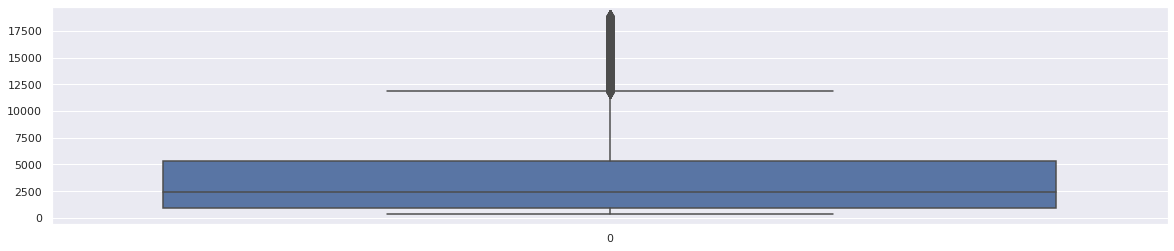

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(df['price'],fliersize=10,);

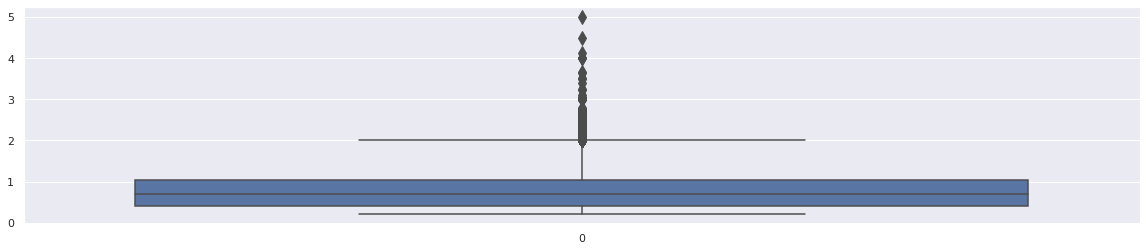

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(df['carat'],fliersize=10,);

Как видно на этих графиков плотности распределения есть сильные аномалии в данных, которые могут навредить регрессионной модели. Прежде чем решать эту задачу посмотрим на распределения других признаков.

Outlier Analysis - Boxplot


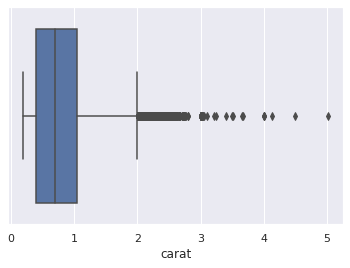

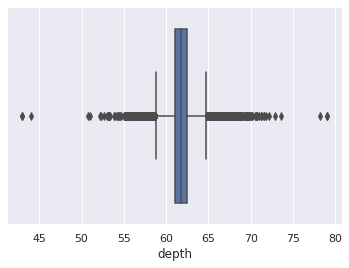

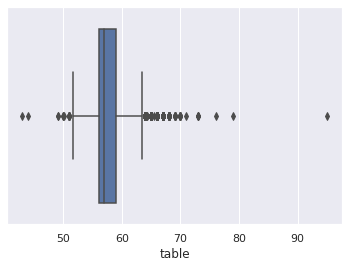

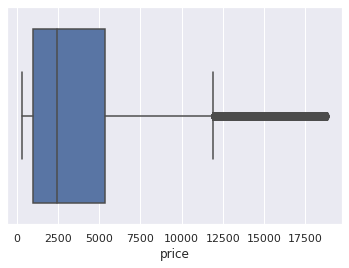

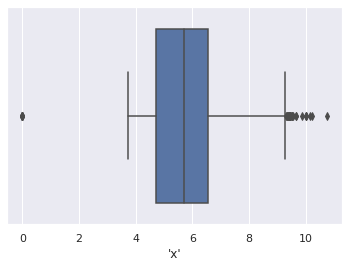

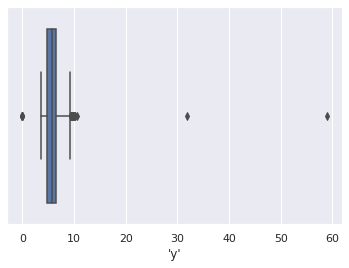

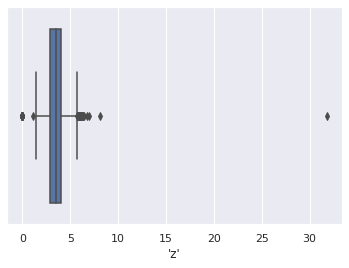

Distribution Analysis - Histogram


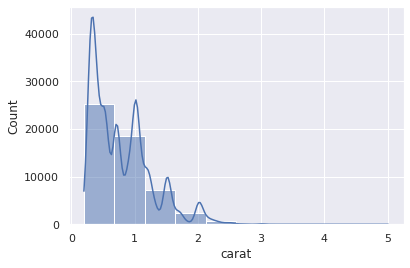

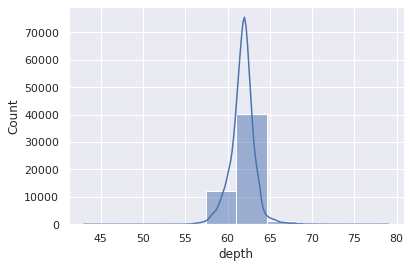

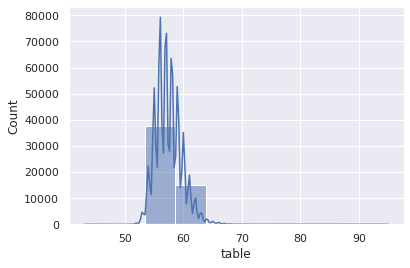

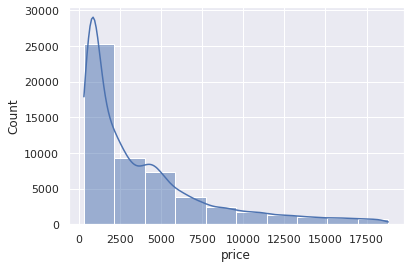

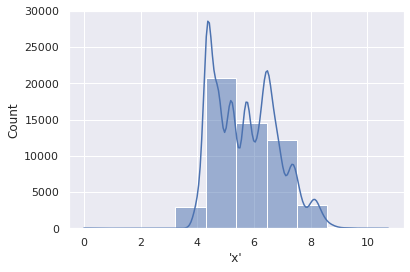

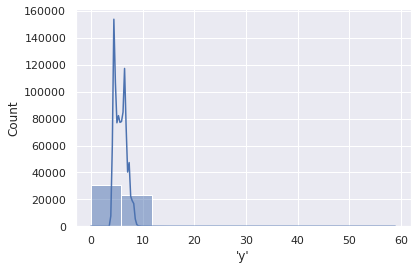

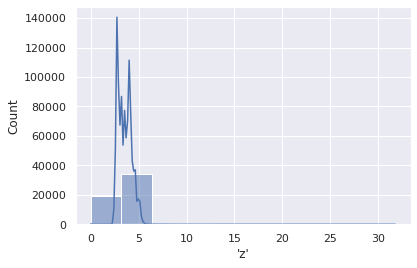

In [ ]:
eda_num(df)

Становится так же очевидность сильная корреляция некоторых признаков. Проверим эту гипотезу.

In [ ]:
eda_num(df, method="correlation")

Correlation Analysis - Heatmap


/usr/local/lib/python3.9/dist-packages/quickda/explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,carat,depth,table,price,'x','y','z'
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
'x',0.98,-0.03,0.20,0.88,1.00,0.97,0.97
'y',0.95,-0.03,0.18,0.87,0.97,1.00,0.95
'z',0.95,0.09,0.15,0.86,0.97,0.95,1.00


А теперь сделаем полноценный отчет.

In [ ]:
explore(df, method="profile", report_name="Design Report")

Output hidden; open in https://colab.research.google.com to view.

Мы посмотрели несколько видов визуализации, из которых можно сделать некоторые выводы.

1. По показателю "price" мы наблюдаем выбросы после 12 000,ограничиваемценув 13000.
2. По размеру бриллианты выбросы начинаются примерно с 3 карат, огрничиваем 3 карата.
3. Так же уберем выбросы по признакам "table", "Y", "Z"

In [ ]:
df_1= df
df_1 = df_1[(df_1["carat"]< 3)]
df_1 = df_1[(df_1['price']< 15000)]
df_1 =  df_1[(df_1["table"]< 64)]
df_1 = df_1[(df_1["'y'"]< 20)]
df_1 = df_1[(df_1["'z'"]< 10)]

Проверим

Outlier Analysis - Boxplot


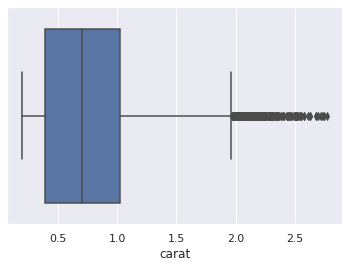

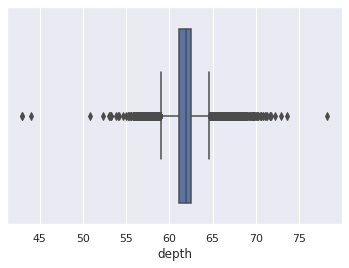

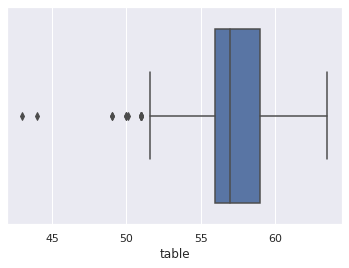

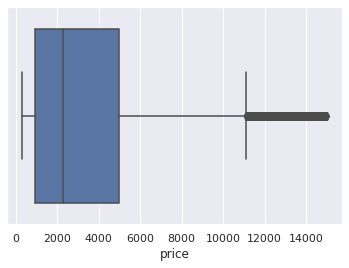

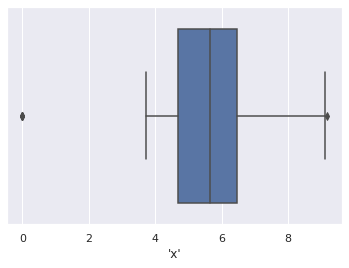

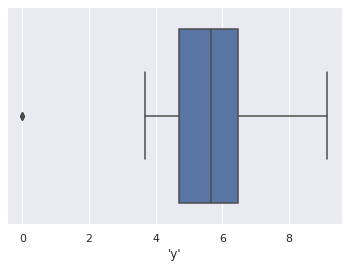

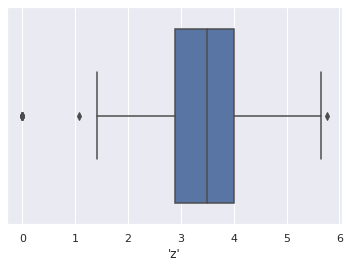

Distribution Analysis - Histogram


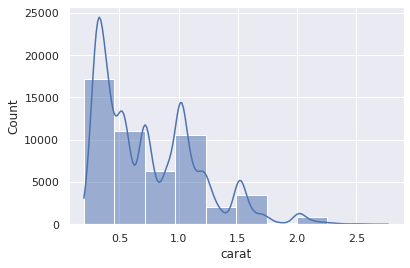

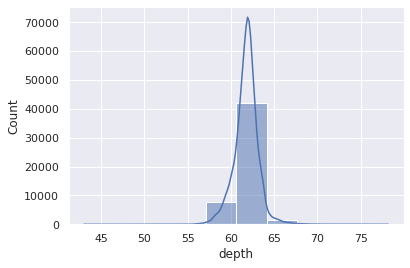

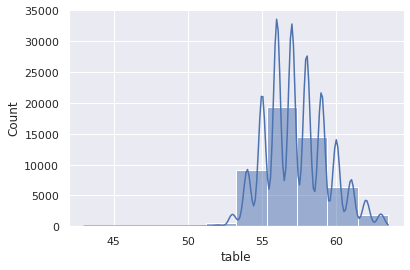

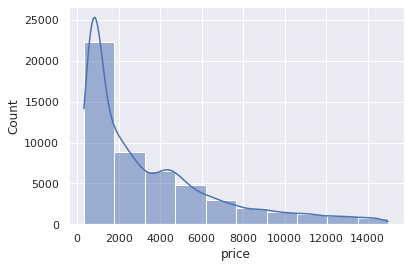

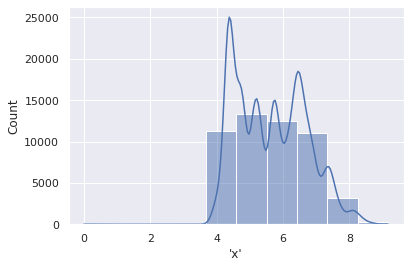

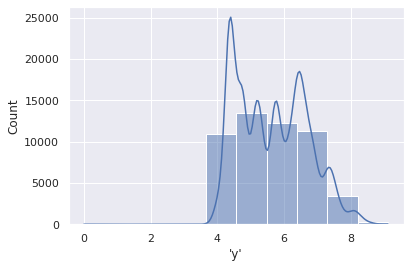

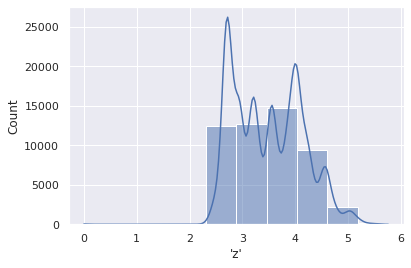

In [ ]:
eda_num(df_1)

Закодируем категориальные признаки

In [ ]:
df_1['cut'] = df_1['cut'].str.replace("b'", "")
df_1['cut'] = df_1['cut'].str.replace("'", "")
df_1['cut'].value_counts()

Ideal        21016
Premium      13197
Very Good    11700
Good          4444
Fair          1341
Name: cut, dtype: int64

In [ ]:
df_1['color'] = df_1['color'].str.replace("b'", "")
df_1['color'] = df_1['color'].str.replace("'", "")
df_1['color'].value_counts()

G    10876
E     9517
F     9197
H     7893
D     6586
I     4987
J     2642
Name: color, dtype: int64

In [ ]:
df_1['clarity'] = df_1['clarity'].str.replace("b'", "")
df_1['clarity'] = df_1['clarity'].str.replace("'", "")
df_1['clarity'].value_counts()

SI1     12544
VS2     11790
SI2      8536
VS1      7860
VVS2     4955
VVS1     3582
IF       1734
I1        697
Name: clarity, dtype: int64

In [ ]:
df_1.to_csv("diamonds_data.csv", index = False)

In [ ]:
from sklearn import preprocessing
label_cut=preprocessing.LabelEncoder()
label_color=preprocessing.LabelEncoder()
label_clarity=preprocessing.LabelEncoder()
df_2=df_1
df_2 = pd.get_dummies(df_2)
df_2.head()

,carat,depth,table,price,'x','y','z',cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336.0,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51698 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          51698 non-null  float64
 1   depth          51698 non-null  float64
 2   table          51698 non-null  float64
 3   price          51698 non-null  float64
 4   'x'            51698 non-null  float64
 5   'y'            51698 non-null  float64
 6   'z'            51698 non-null  float64
 7   cut_Fair       51698 non-null  uint8  
 8   cut_Good       51698 non-null  uint8  
 9   cut_Ideal      51698 non-null  uint8  
 10  cut_Premium    51698 non-null  uint8  
 11  cut_Very Good  51698 non-null  uint8  
 12  color_D        51698 non-null  uint8  
 13  color_E        51698 non-null  uint8  
 14  color_F        51698 non-null  uint8  
 15  color_G        51698 non-null  uint8  
 16  color_H        51698 non-null  uint8  
 17  color_I        51698 non-null  uint8  
 18  color_

Теперь все готово для построения модели

# Sklearn линейная регрессия

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
#from scipy.spatial import distance

In [ ]:
X = df_2.drop(['price'],axis=1)
y = df_2['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_y_pred=lin_reg.predict(X_test) 

In [ ]:
print('Точность простой линейной регресии: ')
crossl = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 4,verbose = 0)
msel = mean_squared_error(y_test, lin_y_pred)
rmsel = mean_squared_error(y_test, lin_y_pred)**0.5
mael = mean_absolute_error(y_test, lin_y_pred)
r2l = r2_score(y_test, lin_y_pred)

print('Cross val     : ',crossl)
print('R2            : ', r2l)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')

Точность простой линейной регресии: 
Cross val     :  [0.92328957 0.92512726 0.91868188 0.91593446]
R2            :  0.9260168143292087
MAE           :  618.9855774546446
MSE (RMSE)    :  818258.3060854955  ( 904.5763130247749 )


# Sklearn Random forest


In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test) 

In [ ]:
print('Точность Random Forest Regressor : ')
crossr = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 4,verbose = 0)
mser = mean_squared_error(y_test, rf_pred)
rmser = mean_squared_error(y_test, rf_pred)**0.5
maer = mean_absolute_error(y_test, rf_pred)
r2r = r2_score(y_test, rf_pred)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Точность Random Forest Regressor : 
Cross val     :  [0.98194386 0.98282097 0.9801278  0.98067877]
R2            :  0.9824483031498223
MAE           :  232.85068268628535
MSE (RMSE)    :  194122.78078237167  ( 440.593668568185 )


# Sklearn Градиентый бустинг

In [ ]:
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.07, loss="squared_error", random_state=42)
gb_reg = gb_reg.fit(X_train, y_train)
gb_reg_pred = gb_reg.predict(X_test)


In [ ]:
print('Точность Gradient Boosting Regressor: ')
crossr = cross_val_score(estimator = gb_reg, X = X_train, y = y_train, cv = 4,verbose = 0)
mser = mean_squared_error(y_test, gb_reg_pred)
rmser = mean_squared_error(y_test, gb_reg_pred)**0.5
maer = mean_absolute_error(y_test, gb_reg_pred)
r2r = r2_score(y_test, gb_reg_pred)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Точность Gradient Boosting Regressor: 
Cross val     :  [0.97365023 0.97412768 0.97136322 0.97020662]
R2            :  0.9734911377672609
MAE           :  309.7386308815555
MSE (RMSE)    :  293189.54719435016  ( 541.4698026615613 )


Оценка точности моделей.

линейнвя регрессия: 

*   Cross val     :  [0.91617613 0.92445957 0.92430379 0.92673211]
*   R2            :  0.9208276678054581
*   MAE           :  629.4281373305029
*   MSE (RMSE)    :  858506.1262353648  ( 926.5560567150618 )

Random Forest Regressor : 

*   Cross val     :  [0.98306436 0.98070006 0.98152034 0.98174347]
*   R2            :  0.9819003643833956
*   MAE           :  234.83281883714218
*   MSE (RMSE)    :  196263.61417901862  ( 443.0164942516459 )

Gradient Boosting Regressor: 
*   Cross val     :  [0.97426202 0.97289022 0.97124891 0.97281603]
*   R2            :  0.9731973698354457
*   MAE           :  316.22886539302937
*   MSE (RMSE)    :  296217.31977740646  ( 544.2585045522086 )

Среди этих простых моделей очень хорошо проявила себя модель Random forest regressor.

# PyCaret


In [ ]:
!pip install git+https://github.com/pycaret/pycaret.git

In [ ]:
from pycaret.regression import *

In [ ]:
# Выделяем 5 процентов данных и прячем их, чтобы в дальнейшем оценить ни новых данных модель.
from sklearn.model_selection import train_test_split
data_diam,  data_unseen = train_test_split(df_1, train_size=0.95, random_state=42)

Создаем модель

In [ ]:
exp_clf101 = setup(data_diam, target = 'price', data_split_shuffle=True, session_id=548) 


,Description,Value
0,Session id,548
1,Target,price
2,Target type,Regression
3,Original data shape,"(49113, 10)"
4,Transformed data shape,"(49113, 27)"
5,Transformed train set shape,"(34379, 27)"
6,Transformed test set shape,"(14734, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


выбираем лучшие модели

In [ ]:
best = compare_models(sort='R2')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:53
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,233.0132,192491.0085,438.3822,0.9823,0.0916,0.0659,19.4630
dt,Decision Tree Regressor,312.8033,361515.2290,601.0640,0.9668,0.1238,0.0857,1.0270
knn,K Neighbors Regressor,460.7718,660915.2250,812.6832,0.9394,0.1881,0.1463,1.5490
lr,Linear Regression,622.7746,842375.0918,917.6630,0.9227,0.5693,0.3480,1.1880
ridge,Ridge Regression,623.0790,842309.4328,917.6291,0.9227,0.5709,0.3481,0.2030
br,Bayesian Ridge,622.8177,842363.2255,917.6568,0.9227,0.5696,0.3480,0.2490
lasso,Lasso Regression,620.8732,843358.0007,918.2219,0.9226,0.5655,0.3431,0.5060
llar,Lasso Least Angle Regression,620.8656,843395.9389,918.2425,0.9226,0.5649,0.3430,0.1900
par,Passive Aggressive Regressor,699.4180,1062966.9943,1026.8056,0.9026,0.7578,0.4629,1.1020
huber,Huber Regressor,740.4876,1217237.5216,1101.5488,0.8883,0.6638,0.4107,0.9180


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,244.7005,187848.8519,433.0297,0.9828,0.1063,0.0814,0.6750
et,Extra Trees Regressor,232.0612,192299.0919,438.1535,0.9824,0.0926,0.0665,15.7890
rf,Random Forest Regressor,233.0132,192491.0085,438.3822,0.9823,0.0916,0.0659,19.4630
xgboost,Extreme Gradient Boosting,243.9254,200211.2734,446.8794,0.9816,0.0972,0.0723,5.5770
gbr,Gradient Boosting Regressor,342.8726,352483.9314,593.4324,0.9677,0.1851,0.1208,4.5040
dt,Decision Tree Regressor,312.8033,361515.2290,601.0640,0.9668,0.1238,0.0857,1.0270
knn,K Neighbors Regressor,460.7718,660915.2250,812.6832,0.9394,0.1881,0.1463,1.5490
ridge,Ridge Regression,623.0790,842309.4328,917.6291,0.9227,0.5709,0.3481,0.2030
br,Bayesian Ridge,622.8177,842363.2255,917.6568,0.9227,0.5696,0.3480,0.2490
lr,Linear Regression,622.7746,842375.0918,917.6630,0.9227,0.5693,0.3480,1.1880


LightGBM и Extra Trees Regressor показывают наилучшие значения по оцениваемым параметрам. Построим отдельно эти модели.

In [ ]:
LGB = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,245.6086,186898.8700,432.3180,0.9829,0.1112,0.0808
1,240.4818,181363.0990,425.8675,0.9834,0.1048,0.0811
2,249.8880,201628.8261,449.0310,0.9815,0.1079,0.0814
3,247.4454,211740.6370,460.1528,0.9804,0.1071,0.0823
4,237.2630,165919.9575,407.3327,0.9852,0.1035,0.0805
5,236.7373,168332.5560,410.2835,0.9842,0.1054,0.0825
6,247.2579,191158.4245,437.2167,0.9828,0.1062,0.0809
7,244.1296,186233.4442,431.5477,0.9830,0.1019,0.0786
8,241.3547,172566.3595,415.4111,0.9839,0.1058,0.0821


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

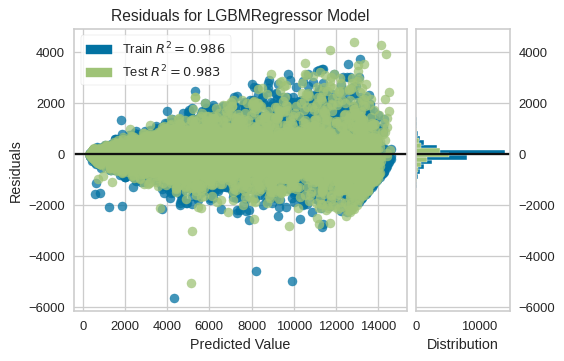

In [ ]:
plot_model(LGB,scale=1.3)

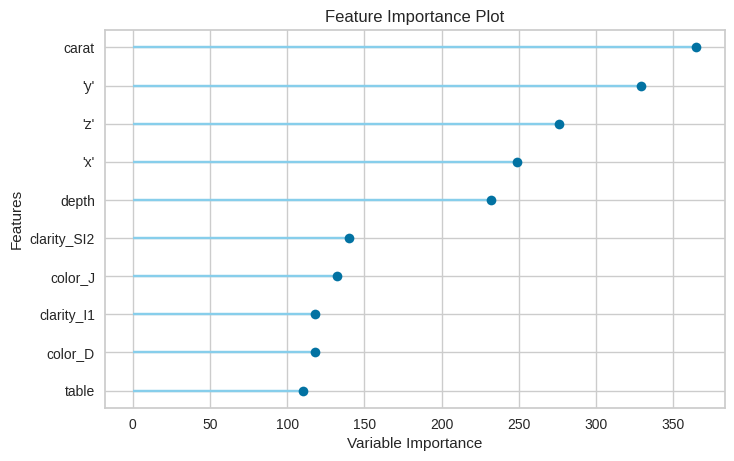

In [ ]:
plot_model(LGB, plot = 'feature')

Довольно очевидно, что наиболее знаичимым параметром является размер бриллианта.

In [ ]:
Et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,230.8792,182331.5398,427.0030,0.9833,0.0969,0.0665
1,230.2165,183307.9259,428.1447,0.9832,0.0912,0.0663
2,232.9546,194909.9196,441.4860,0.9821,0.0931,0.0670
3,229.5013,203340.4288,450.9328,0.9812,0.0896,0.0643
4,220.3207,165797.3439,407.1822,0.9852,0.0904,0.0653
5,224.9659,179507.2651,423.6830,0.9832,0.0924,0.0670
6,240.2396,206926.1846,454.8914,0.9813,0.0927,0.0670
7,230.5867,187053.8954,432.4973,0.9829,0.0893,0.0643
8,234.6460,194726.8962,441.2787,0.9818,0.0925,0.0675


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

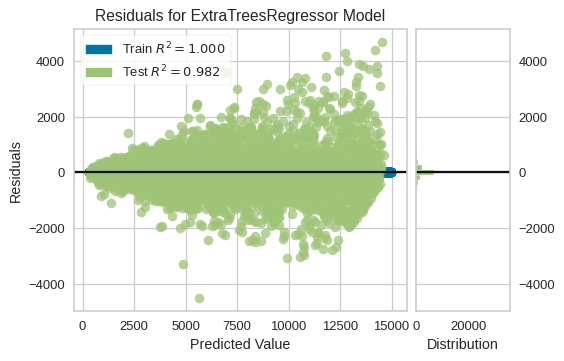

In [ ]:
plot_model(Et,scale=1.3)

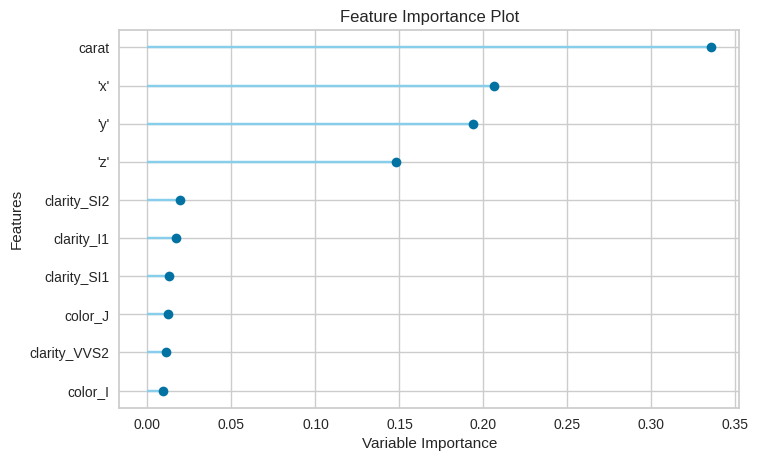

In [ ]:
plot_model(Et, plot = 'feature')

В данной модели мы так же наблюдаем важность размера, однако здесь ее значение значительно выше, как-будто огранка и качество практически не играют роли.

Построим гибридную модель, состоящую как из lightGBM так и Extra decision tree.

In [ ]:
blend = blend_models(estimator_list=[LGB,Et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,227.8546,170730.9546,413.1960,0.9844,0.0975,0.0698
1,225.5378,169073.3229,411.1853,0.9845,0.0909,0.0698
2,230.3784,184252.0857,429.2460,0.9831,0.0940,0.0703
3,228.7065,193077.2600,439.4056,0.9821,0.0915,0.0695
4,218.5923,152310.6112,390.2699,0.9864,0.0902,0.0693
5,220.0470,159679.4065,399.5991,0.9850,0.0917,0.0705
6,233.3977,185548.7702,430.7537,0.9833,0.0937,0.0702
7,226.4361,171018.6368,413.5440,0.9843,0.0892,0.0677
8,227.3207,168926.8051,411.0071,0.9842,0.0920,0.0707


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Получившаяся гибридная модель имеет совсем немного улучшенную точность. Оценим ее.

In [ ]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

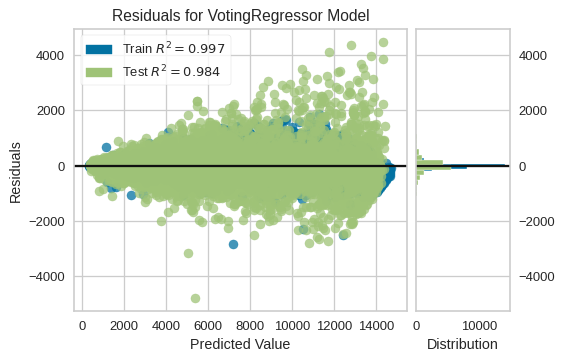

In [ ]:
plot_model(blend,scale=1.3)

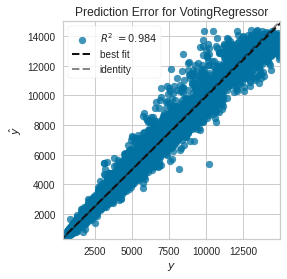

In [ ]:
plot_model(blend, plot='error')

In [ ]:
predict_model(blend);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,232.9139,183859.0495,428.7879,0.9836,0.0929,0.0710


In [ ]:
final_blend = finalize_model(blend)
print(final_blend)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['carat', 'depth', 'table', "'x'",
                                             "'y'", "'z'"],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(incl...
                                    transformer=OneHotEncoder(cols=['cut',
                                                                    'color',
                                                                    'clarity'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
              

Проверим получившуюся модель на скрытых данных, которые мы спрятали перед построением основной модели.

In [ ]:
unseen_predictions = predict_model(final_blend, data=data_unseen)
unseen_predictions.head(20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,231.2788,192072.2105,438.2604,0.9827,0.0899,0.0672


,carat,cut,color,clarity,depth,table,'x','y','z',price,prediction_label
2288,0.90,Ideal,J,VS2,61.299999,57.0,6.16,6.24,3.80,3160.0,3229.932692
46530,0.51,Premium,G,VS1,62.900002,58.0,5.10,5.05,3.19,1781.0,1723.099325
27838,0.40,Ideal,G,SI2,60.599998,56.0,4.82,4.79,2.91,651.0,743.873275
38218,0.43,Premium,E,SI1,60.200001,60.0,4.94,4.89,2.96,1016.0,923.746899
19825,1.07,Ideal,G,VVS2,62.400002,54.0,6.51,6.56,4.08,8393.0,8338.121652
36814,0.30,Very Good,G,IF,63.500000,55.0,4.28,4.26,2.71,956.0,866.708480
3031,0.31,Ideal,D,SI1,61.299999,55.0,4.36,4.41,2.69,565.0,629.921381
35133,0.41,Very Good,D,VS2,62.500000,60.0,4.72,4.75,2.96,889.0,939.249634
28613,0.30,Ideal,E,SI1,62.900002,56.0,4.31,4.24,2.69,675.0,667.852334
50168,0.71,Ideal,I,SI1,62.500000,57.0,5.69,5.74,3.57,2218.0,2258.221663


Мы видим, что точность сравнима со значениями на тестовых данных, значит можно сохранять эту модель.

In [ ]:
save_model(final_blend,'final_blend 16.03.2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['carat', 'depth', 'table', "'x'",
                                              "'y'", "'z'"],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['cut', 'color', 'clarity'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(incl...
                                     transformer=OneHotEncoder(cols=['cut',
                                                                     'color',
                                                                     'clarity'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),

In [ ]:
saved_blend = load_model('final_blend 16.03.2023')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_blend, data=data_unseen)
new_prediction.to_excel('new_diamonds_predictions.xls')
new_prediction.head(20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,231.2788,192072.2105,438.2604,0.9827,0.0899,0.0672


,carat,cut,color,clarity,depth,table,'x','y','z',price,prediction_label
2288,0.90,Ideal,J,VS2,61.299999,57.0,6.16,6.24,3.80,3160.0,3229.932692
46530,0.51,Premium,G,VS1,62.900002,58.0,5.10,5.05,3.19,1781.0,1723.099325
27838,0.40,Ideal,G,SI2,60.599998,56.0,4.82,4.79,2.91,651.0,743.873275
38218,0.43,Premium,E,SI1,60.200001,60.0,4.94,4.89,2.96,1016.0,923.746899
19825,1.07,Ideal,G,VVS2,62.400002,54.0,6.51,6.56,4.08,8393.0,8338.121652
36814,0.30,Very Good,G,IF,63.500000,55.0,4.28,4.26,2.71,956.0,866.708480
3031,0.31,Ideal,D,SI1,61.299999,55.0,4.36,4.41,2.69,565.0,629.921381
35133,0.41,Very Good,D,VS2,62.500000,60.0,4.72,4.75,2.96,889.0,939.249634
28613,0.30,Ideal,E,SI1,62.900002,56.0,4.31,4.24,2.69,675.0,667.852334
50168,0.71,Ideal,I,SI1,62.500000,57.0,5.69,5.74,3.57,2218.0,2258.221663


# AutoGluon

In [ ]:
!pip install mxnet autogluon

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
label = 'price'
print("Summary of class variable: \n", data_diam[label].describe())
quantile_levels = [0.1, 0.5, 0.9]

Summary of class variable: 
 count    49113.000000
mean      3518.678476
std       3314.986182
min        326.000000
25%        926.000000
50%       2294.000000
75%       4991.000000
max      14998.000000
Name: price, dtype: float64


In [ ]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path).fit(data_diam)

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    49113
Train Data Columns: 9
Label Column: price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14998.0, 326.0, 3518.67848, 3314.98618)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11101.69 MB
	Train Data (Original)  Memory Usage: 11.27 MB (0.1% of available memory)
	Inferring data type

[1000]	valid_set's rmse: 410.742
[2000]	valid_set's rmse: 407.215
[3000]	valid_set's rmse: 406.944


	-406.7272	 = Validation score   (-root_mean_squared_error)
	21.73s	 = Training   runtime
	1.04s	 = Validation runtime
Fitting model: LightGBM ...
	-406.6808	 = Validation score   (-root_mean_squared_error)
	2.66s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-425.407	 = Validation score   (-root_mean_squared_error)
	75.68s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: CatBoost ...
	-406.781	 = Validation score   (-root_mean_squared_error)
	195.62s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-415.3639	 = Validation score   (-root_mean_squared_error)
	25.81s	 = Training   runtime
	0.55s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-433.8357	 = Validation score   (-root_mean_squared_error)
	67.21s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: XGBoost ...
	-422.5374	 = Validation score   (-root_mean_squared_error)
	6.44s	 = Training   runtime
	0.05s	 = Val

[1000]	valid_set's rmse: 407.327


	-406.7671	 = Validation score   (-root_mean_squared_error)
	11.2s	 = Training   runtime
	0.61s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-395.2595	 = Validation score   (-root_mean_squared_error)
	0.77s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 488.5s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("agModels-predictClass/")


In [ ]:
y_test = data_unseen['price']  # values to predict
# delete label column to prove we're not cheating
test_data_nolab = data_unseen.drop(columns=['price'])  
test_data_nolab.head()

,carat,cut,color,clarity,depth,table,'x','y','z'
2288,0.90,Ideal,J,VS2,61.3,57.0,6.16,6.24,3.80
46530,0.51,Premium,G,VS1,62.9,58.0,5.10,5.05,3.19
27838,0.40,Ideal,G,SI2,60.6,56.0,4.82,4.79,2.91
38218,0.43,Premium,E,SI1,60.2,60.0,4.94,4.89,2.96
19825,1.07,Ideal,G,VVS2,62.4,54.0,6.51,6.56,4.08


In [ ]:
#predictor = TabularPredictor.load(save_path) 
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred)

Evaluation: root_mean_squared_error on test data: -428.0823276841458
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -428.0823276841458,
    "mean_squared_error": -183254.4792754764,
    "mean_absolute_error": -225.0010941466695,
    "r2": 0.9834538111874176,
    "pearsonr": 0.9917485037215704,
    "median_absolute_error": -89.6700439453125
}


Predictions:  
 2288      3251.910889
46530     1687.965088
27838      732.857239
38218      945.029053
19825     8394.953125
             ...     
46819     2298.684570
19280     7894.820312
25339    13683.583984
29967      471.451660
15498     6115.569336
Name: price, Length: 2585, dtype: float32


Итак, мы получили высокую точность по R2 на новых (скрытых) данных.

In [ ]:
predictor.leaderboard(data_unseen, extra_metrics=['r2', 'rmse'], silent=True)

,model,score_test,r2,root_mean_squared_error,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-428.082328,0.983454,-428.082328,-395.259473,4.033971,2.695938,392.752640,0.006945,0.001087,0.767567,2,True,12
1,LightGBMLarge,-434.049239,0.982989,-434.049239,-406.767131,0.591404,0.607581,11.204588,0.591404,0.607581,11.204588,1,True,11
2,CatBoost,-434.141305,0.982982,-434.141305,-406.781039,0.083247,0.042647,195.621716,0.083247,0.042647,195.621716,1,True,6
3,LightGBM,-435.252904,0.982895,-435.252904,-406.680771,0.150577,0.126651,2.662571,0.150577,0.126651,2.662571,1,True,4
4,LightGBMXT,-437.254786,0.982737,-437.254786,-406.727239,1.205835,1.035354,21.733037,1.205835,1.035354,21.733037,1,True,3
5,XGBoost,-448.442641,0.981842,-448.442641,-422.537432,0.064285,0.052268,6.443921,0.064285,0.052268,6.443921,1,True,9
6,ExtraTreesMSE,-450.264737,0.981695,-450.264737,-415.363929,0.984009,0.547904,25.808522,0.984009,0.547904,25.808522,1,True,7
7,NeuralNetFastAI,-452.295031,0.981529,-452.295031,-433.835658,0.130081,0.079858,67.214880,0.130081,0.079858,67.214880,1,True,8
8,RandomForestMSE,-468.214523,0.980206,-468.214523,-425.406998,0.990722,0.312908,75.681624,0.990722,0.312908,75.681624,1,True,5
9,NeuralNetTorch,-485.096154,0.978753,-485.096154,-442.084763,0.021231,0.021804,59.273015,0.021231,0.021804,59.273015,1,True,10


In [ ]:
predictor.feature_importance(data_unseen)

Computing feature importance via permutation shuffling for 9 features using 2585 rows with 5 shuffle sets...
	224.25s	= Expected runtime (44.85s per shuffle set)
	131.98s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
carat,2593.398072,34.623007,3.811189e-09,5,2664.687323,2522.108822
'y',1120.525880,14.904859,3.755802e-09,5,1151.215190,1089.836569
clarity,1025.271398,21.432980,2.290357e-08,5,1069.402201,981.140595
color,675.103666,21.647917,1.266977e-07,5,719.677027,630.530305
'z',281.386059,6.216544,2.856829e-08,5,294.186008,268.586109
'x',205.657669,6.846046,1.471362e-07,5,219.753772,191.561565
cut,36.174877,3.981165,1.732259e-05,5,44.372151,27.977603
depth,14.760268,2.190916,5.657902e-05,5,19.271394,10.249142
table,8.196941,3.238986,2.403270e-03,5,14.866057,1.527825


In [ ]:
predictor.fit_summary()

In [ ]:
perf = predictor.evaluate(data_unseen)

/usr/local/lib/python3.9/dist-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning:

Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.

Evaluation: root_mean_squared_error on test data: -428.0823276841458
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -428.0823276841458,
    "mean_squared_error": -183254.4792754764,
    "mean_absolute_error": -225.0010941466695,
    "r2": 0.9834538111874176,
    "pearsonr": 0.9917485037215704,
    "median_absolute_error": -89.6700439453125
}


In [ ]:
predictor.get_model_best()

'WeightedEnsemble_L2'

In [ ]:
data=pd.DataFrame()
preds = np.array(y_pred)
data['predict']=y_pred

In [ ]:
data

,predict
2288,3251.910889
46530,1687.965088
27838,732.857239
38218,945.029053
19825,8394.953125
...,...
46819,2298.684570
19280,7894.820312
25339,13683.583984
29967,471.451660


In [ ]:
final_predict = data_unseen.join(data)

In [ ]:
final_predict

,carat,cut,color,clarity,depth,table,price,'x','y','z',predict
2288,0.90,Ideal,J,VS2,61.3,57.0,3160.0,6.16,6.24,3.80,3251.910889
46530,0.51,Premium,G,VS1,62.9,58.0,1781.0,5.10,5.05,3.19,1687.965088
27838,0.40,Ideal,G,SI2,60.6,56.0,651.0,4.82,4.79,2.91,732.857239
38218,0.43,Premium,E,SI1,60.2,60.0,1016.0,4.94,4.89,2.96,945.029053
19825,1.07,Ideal,G,VVS2,62.4,54.0,8393.0,6.51,6.56,4.08,8394.953125
...,...,...,...,...,...,...,...,...,...,...,...
46819,0.72,Premium,E,SI2,59.3,60.0,1808.0,5.88,5.85,3.48,2298.684570
19280,1.06,Premium,G,VVS2,59.6,58.0,8003.0,6.61,6.65,3.95,7894.820312
25339,2.30,Premium,H,SI2,60.6,59.0,14042.0,8.40,8.37,5.08,13683.583984
29967,0.31,Ideal,H,SI1,62.7,56.0,446.0,4.33,4.38,2.73,471.451660


# Итоговое сравнение моделей.


линейнвя регрессия: 

*   R2            :  0.9208
*   RMSE          :  926.5560

Random Forest Regressor : 

*   R2            :  0.9819
*   RMSE          :  443.016

Gradient Boosting Regressor: 

*   R2            :  0.9731
*   RMSE          :  544.2585

PyCaret

*   R2            :  0.9839
*   RMSE          :  418.8222

AutoGluon

*   R2            :  0.9834
*   RMSE          :  428.0823


PyCaret с минимальным перевесом побеждает в обеих метриках.


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=df7bb93b446656d4ddfd3b20268df02e863d301496bfea2c1b340ec8e09e153f
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpka5wb4rw
  JVM stdout: /tmp/tmpka5wb4rw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpka5wb4rw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_lhy0kx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"
